In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame()
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from matplotlib.colors import ListedColormap
import math


In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

pdays = number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Almost all of the 'pdays' values are 999

(999 = 39673)

In [ ]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [ ]:
df.loc[(df['pdays']==999) & (df['previous']>= 1), :]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,39,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,144,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,449,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,114,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24113,29,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,86,1,999,1,failure,-0.1,93.200,-42.0,4.245,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,admin.,married,university.degree,no,no,no,telephone,nov,wed,651,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,293,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,329,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,180,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


There are some rows that 'pdays' == 999 (not previously contacted) and at the same time 'previous' >= 1 (number of contacts performed before this campaign and for this client) What is weird, 'previous' was supposed to be == 0, or 'pdays' != 999

In [ ]:
df['poutcome'].value_counts()


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

We have 41188 rows, more than 85% of the values of there columns are the same. We need to check if it's worth it using these columns or not!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

The value types seem to be correct

In [ ]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


There are some columns with the value == unknown in 'education', 'loan', 'housing' and 'default'

In [ ]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

There are no "January" or "February" in the "month" column of the data set

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.duplicated().any

<bound method NDFrame._add_numeric_operations.<locals>.any of 0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool>

In [ ]:
df.drop_duplicates(inplace=True)
print(df.shape)

(41176, 21)


In [ ]:
df['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

Since there are only 71 rows in 40858 in marital == unknown, they are going to be dropped

In [ ]:
df = df.drop((df.loc[df['marital'] == 'unknown', :]).index, axis=0)
df = df.reset_index(drop=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41091,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41092,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41093,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41094,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df['education'].value_counts()

university.degree      12133
high.school             9498
basic.9y                6037
professional.course     5234
basic.4y                4170
basic.6y                2285
unknown                 1721
illiterate                18
Name: education, dtype: int64

But in education, there are more than 1500 rows == unknown, they will be treated later

In [ ]:
print(df['default'].value_counts())
print(df.loc[(df['default']=='unknown'), 'y'].value_counts())
print(df.loc[(df['default']=='yes'), 'y'].value_counts())
print(df.loc[(df['default']=='no'), 'y'].value_counts()) 

no         32508
unknown     8585
yes            3
Name: default, dtype: int64
no     8142
yes     443
Name: y, dtype: int64
no    3
Name: y, dtype: int64
no     28324
yes     4184
Name: y, dtype: int64


There are only 3 rows in 'default' == 'yes' and in all of them 'y' == 'no' and if we were to replace 'unknown' values, probably most or all of them would be == 'no'. This feature will be removed, instead of treated, since is not so useful for the model.

In [ ]:
df = df.drop('default', axis=1)
df.shape

(41096, 20)

In [ ]:
print(df['housing'].value_counts())
print(df.loc[(df['housing']=='unknown'), 'y'].value_counts())
print(df.loc[(df['housing']=='yes'), 'y'].value_counts())
print(df.loc[(df['housing']=='no'), 'y'].value_counts()) 

yes        21536
no         18571
unknown      989
Name: housing, dtype: int64
no     882
yes    107
Name: y, dtype: int64
no     19034
yes     2502
Name: y, dtype: int64
no     16553
yes     2018
Name: y, dtype: int64


In [ ]:
print(df['loan'].value_counts())
print(df.loc[(df['loan']=='unknown'), 'y'].value_counts())
print(df.loc[(df['loan']=='yes'), 'y'].value_counts())
print(df.loc[(df['loan']=='no'), 'y'].value_counts()) 

no         33871
yes         6236
unknown      989
Name: loan, dtype: int64
no     882
yes    107
Name: y, dtype: int64
no     5554
yes     682
Name: y, dtype: int64
no     30033
yes     3838
Name: y, dtype: int64


In [ ]:
print(df.loc[(df['loan']=='unknown'), 'housing'].value_counts()) 


unknown    989
Name: housing, dtype: int64


The rows where df['loan']=='unknown' are the same where df['housing']=='unknown', 989 items that will be replaced with the mode value of each column. What seems more reasonable to do and it won't compromise our dataframe. Most of the missing values in 'y' == 'no', and also in the mode value of the columns as well.

In [ ]:
mode_h = df['housing'].mode()
mode_l = df['loan'].mode()
print('The mode value of housing column is '+ mode_h)
print('The mode value of loan column is '+ mode_l)

0    The mode value of housing column is yes
dtype: object
0    The mode value of loan column is no
dtype: object


In [ ]:
df.loc[(df['housing']=='unknown'), 'housing'] = 'yes'
print(df['housing'].value_counts())

yes    22525
no     18571
Name: housing, dtype: int64


In [ ]:
df.loc[(df['loan']=='unknown'), 'loan'] = 'no'
print(df['loan'].value_counts())

no     34860
yes     6236
Name: loan, dtype: int64


**Outliers**

In [ ]:
def limits(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    amp = q3 - q1
    
    return q1 - 1.5*amp, q3 + 1.5 * amp

def delete_outliers(df, column):
    number_rows = df.shape[0]
    min_limit, max_limit = limits(df[column])
    df = df.loc[(df[column] >= min_limit) & (df[column] <= max_limit), :]
    removed_rows = number_rows - df.shape[0]
    
    return df, removed_rows

def get_median(df, column):
    min_limit, max_limit = limits(df[column])
    median = df[column].median()
    try:
        df.loc[(df[column] <= min_limit), column] = median
    except:
        pass
    
    try:
        df.loc[(df[column] >= max_limit), column] = median
    except:
        pass
    
    return df

    def fill_f(df, column):
        min_limit, max_limit = limits(df[column])
    
    try:
        df.loc[(df[column] <= min_limit), column] = np.nan
    except:
        pass
    
    try:
        df.loc[(df[column] >= max_limit), column] = np.nan
    except:
        pass
        
    return df.ffill(axis=0, inplace=True)

In [ ]:
def box_d(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    fig.set_size_inches(15, 5)
    
    sns.boxplot(x=column, ax = ax1)
    ax2.set_xlim(limits(column))
    sns.boxplot(x=column, ax = ax2)
    
def histogram(column):
    plt.figure(figsize=(15, 5))
    sns.histplot(column, kde=True)
    
def bar_graph(column):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=column.value_counts().index, y=column.value_counts())
    ax.set_xlim(limits(column))

Since there are many outliers in this column, instead of deleting them, we are going to replace them with back/forward values

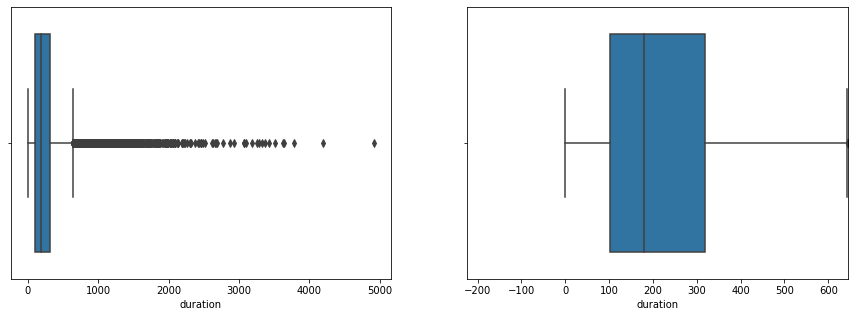

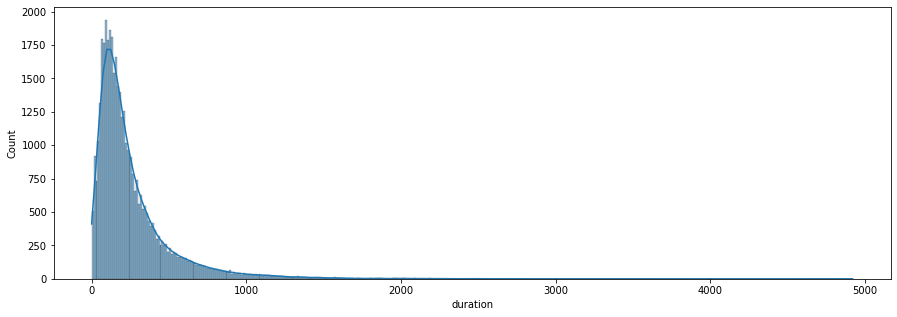

In [ ]:
box_d(df["duration"])
histogram(df["duration"])

(41096, 20)

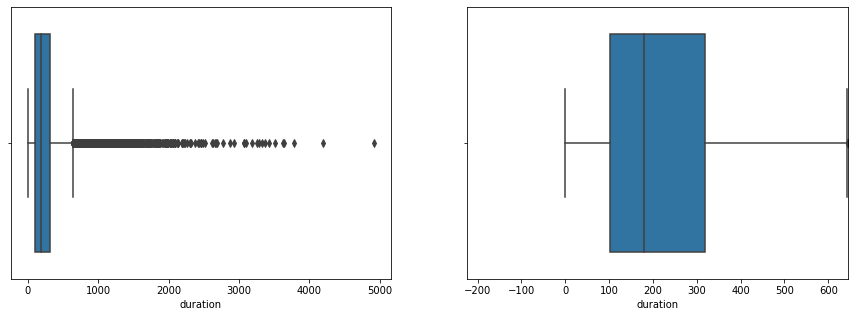

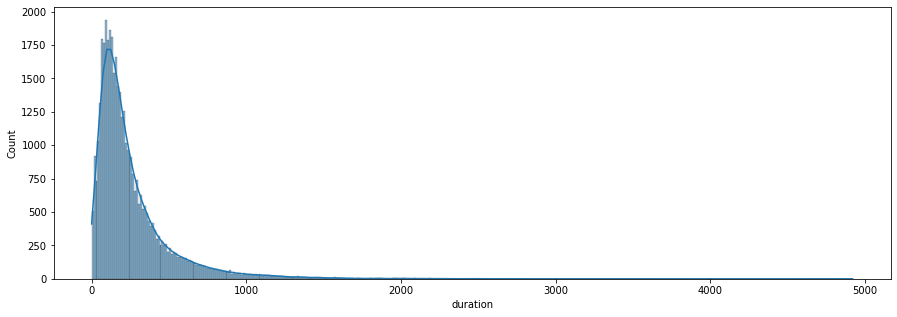

In [ ]:
box_d(df["duration"])
histogram(df["duration"])
display(df.shape)

In [ ]:
df['duration'].value_counts()

90      170
85      170
136     168
73      166
124     163
       ... 
1569      1
1611      1
1169      1
859       1
1868      1
Name: duration, Length: 1544, dtype: int64

<ipython-input-82-f4c10f137753>:7: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax2.set_xlim(limits(column))


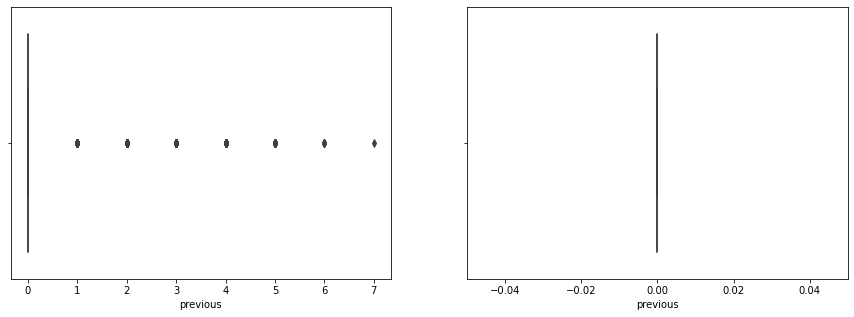

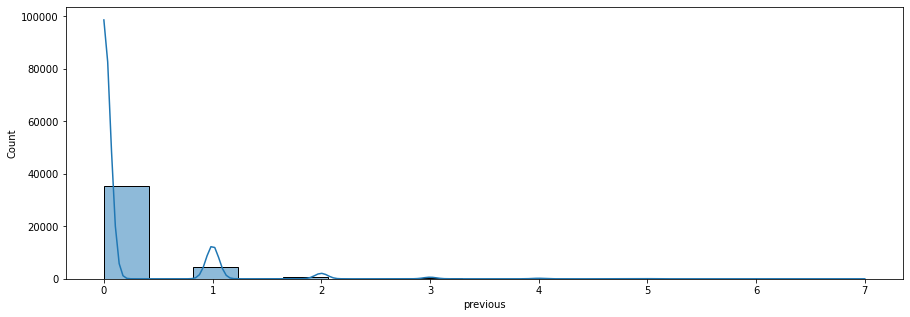

In [ ]:
box_d(df["previous"])
histogram(df["previous"])

In [ ]:
df['previous'].value_counts()

0    35489
1     4547
2      750
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [ ]:
numbers = [4, 5, 6, 7]
for i in numbers:
    df = df.drop(df.loc[df['previous'] == i, :].index, axis=0)
    
display(df.shape)
display(df['previous'].value_counts())

(41002, 20)

0    35489
1     4547
2      750
3      216
Name: previous, dtype: int64

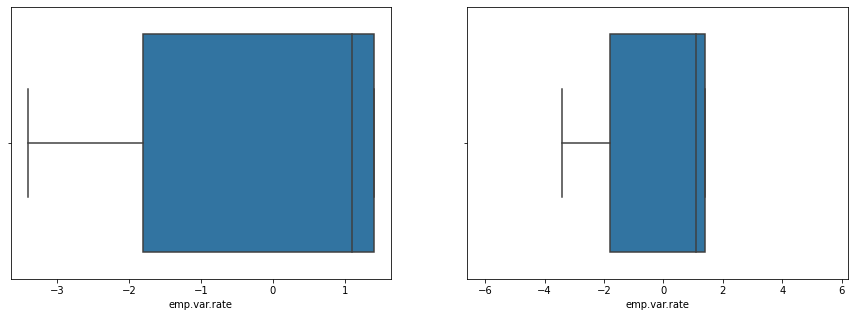

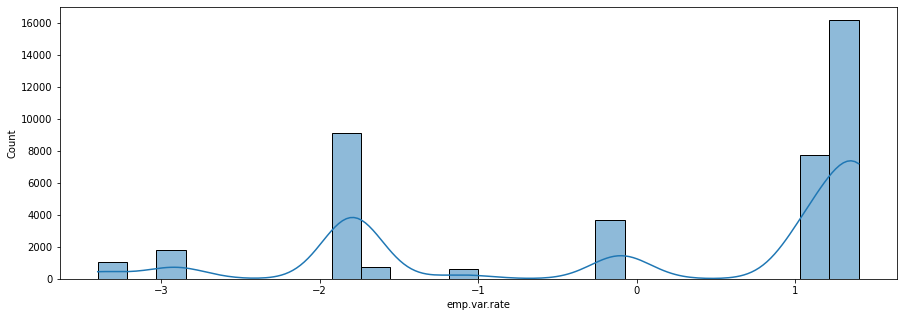

In [ ]:
box_d(df["emp.var.rate"])
histogram(df["emp.var.rate"])

In [ ]:
df['emp.var.rate'].value_counts()

 1.4    16203
-1.8     9136
 1.1     7747
-0.1     3675
-2.9     1653
-3.4     1067
-1.7      744
-1.1      595
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

The values are balanced

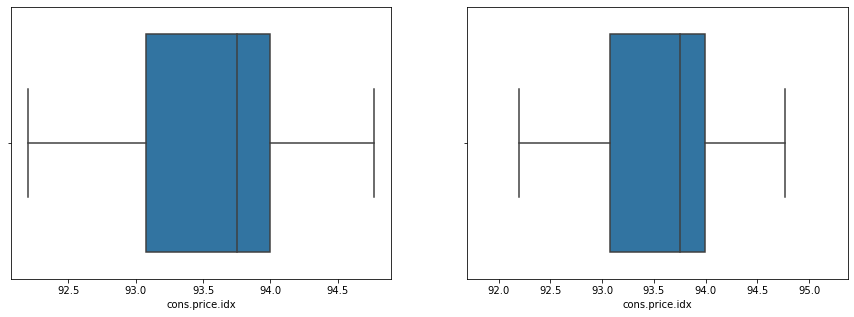

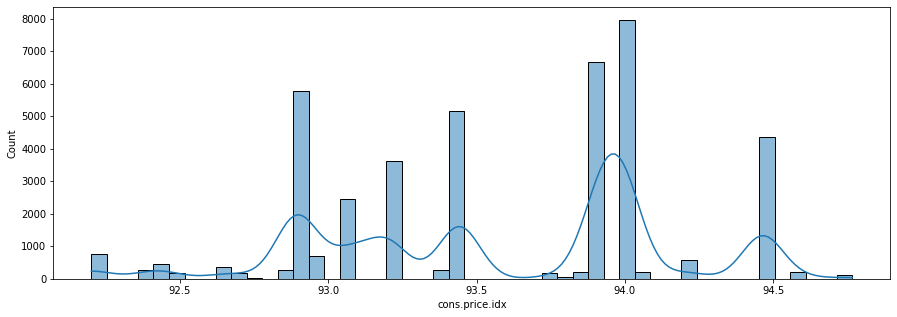

In [ ]:
box_d(df["cons.price.idx"])
histogram(df["cons.price.idx"])

In [ ]:
df['cons.price.idx'].value_counts()

93.994    7747
93.918    6672
92.893    5775
93.444    5166
94.465    4365
93.200    3608
93.075    2454
92.201     765
92.963     711
92.431     444
92.649     356
94.215     309
94.199     284
92.843     281
92.379     267
93.369     258
94.055     220
94.027     215
94.601     197
93.876     196
92.469     177
92.713     172
93.749     172
94.767     114
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

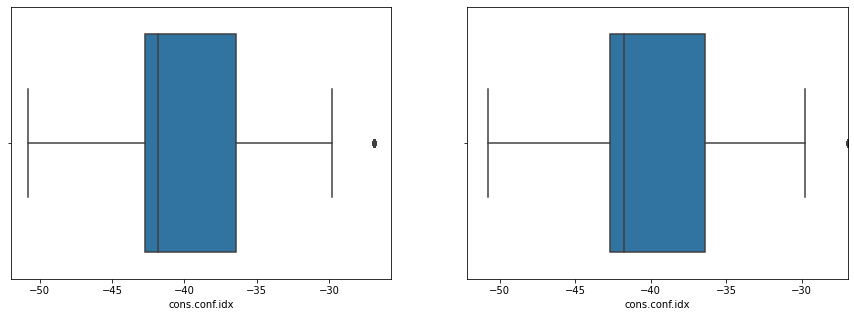

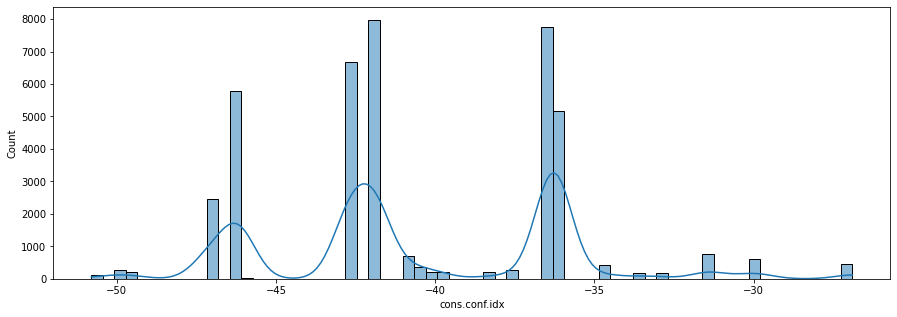

In [ ]:
box_d(df["cons.conf.idx"])
histogram(df["cons.conf.idx"])

In [ ]:
df['cons.conf.idx'].value_counts()

-36.4    7747
-42.7    6672
-46.2    5775
-36.1    5166
-41.8    4365
-42.0    3608
-47.1    2454
-31.4     765
-40.8     711
-26.9     444
-30.1     356
-40.3     309
-37.5     284
-50.0     281
-29.8     267
-34.8     258
-39.8     220
-38.3     215
-49.5     197
-40.0     196
-33.6     177
-33.0     172
-34.6     172
-50.8     114
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

Number of rows deleted: 444
(40558, 20)


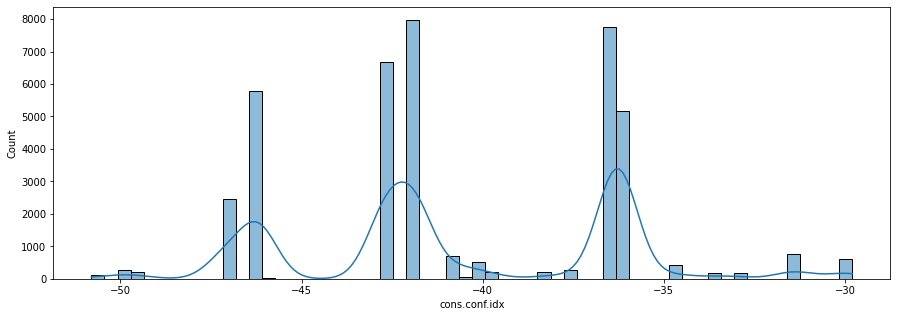

In [ ]:
df, removed_rows = delete_outliers(df, 'cons.conf.idx')
print(f"Number of rows deleted: {removed_rows}")
histogram(df['cons.conf.idx'])
print(df.shape)

There weren't many outliers, compared to the shape of the dataframe, so we preferred to drop them

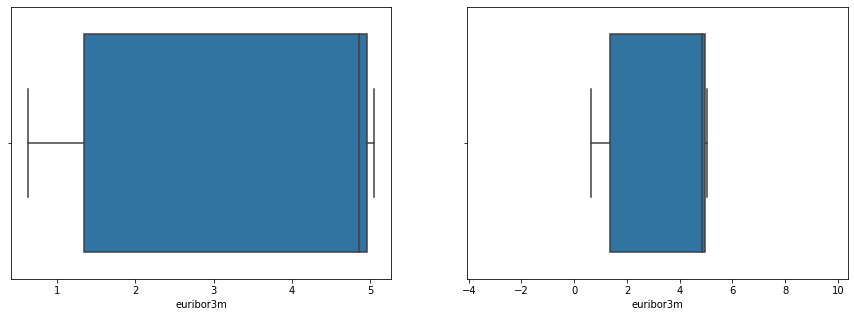

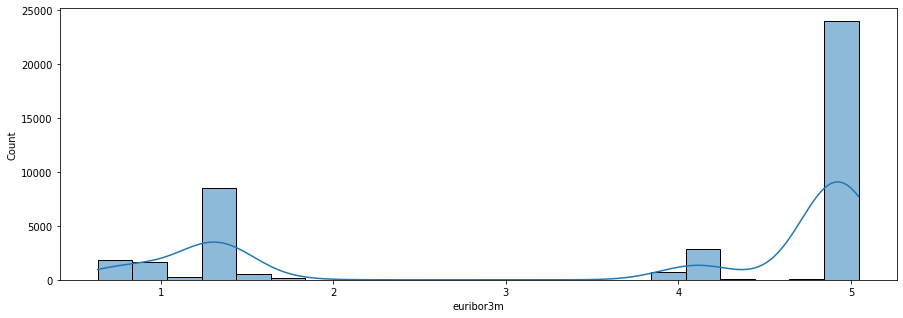

In [ ]:
box_d(df["euribor3m"])
histogram(df["euribor3m"])

No outliers

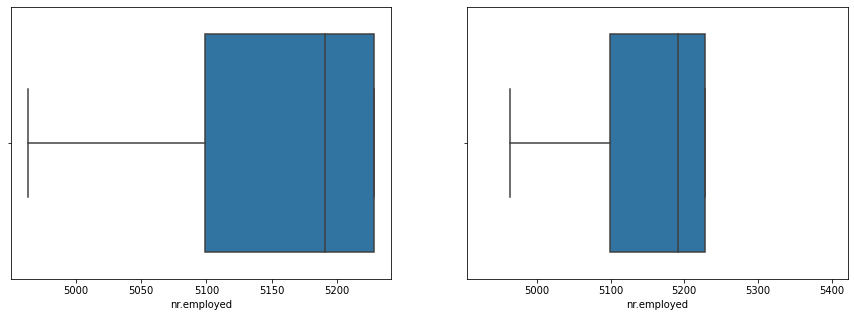

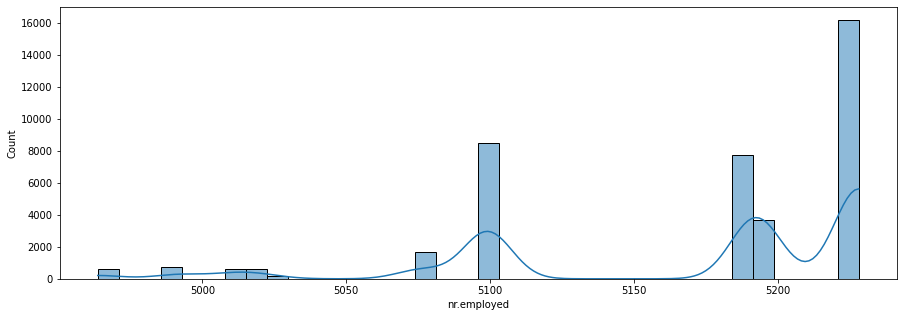

In [ ]:
box_d(df["nr.employed"])
histogram(df["nr.employed"])

0 outliers in this one

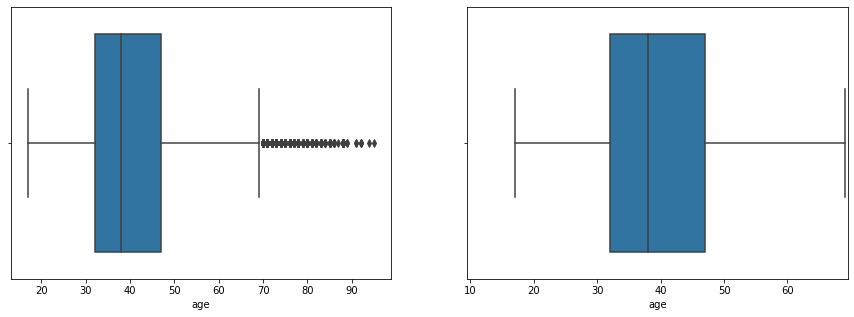

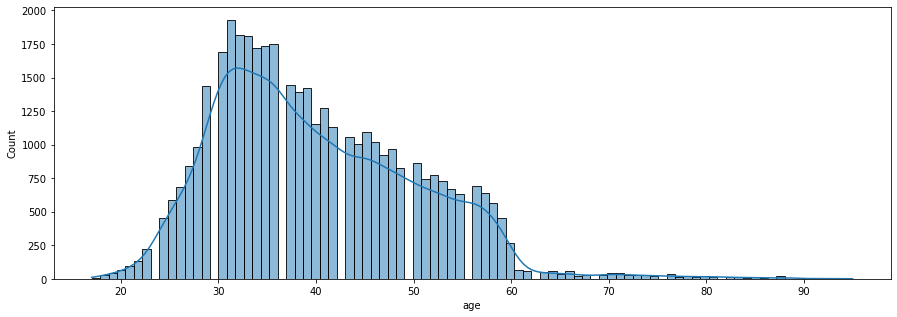

In [ ]:
box_d(df["age"])
histogram(df["age"])

In [ ]:
df['age'].value_counts()

31    1929
32    1817
33    1807
36    1751
35    1737
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 77, dtype: int64

Number of rows deleted: 404
(40154, 20)


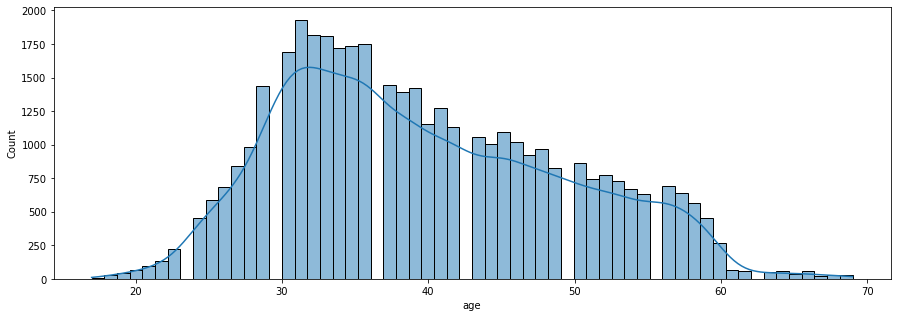

In [ ]:
df, removed_rows = delete_outliers(df, 'age')
print(f"Number of rows deleted: {removed_rows}")
histogram(df['age'])
print(df.shape)

In [ ]:
df = df.reset_index(drop=True)
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40149,37,admin.,married,university.degree,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
40150,29,unemployed,single,basic.4y,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
40151,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
40152,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


**Now we will check text features**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


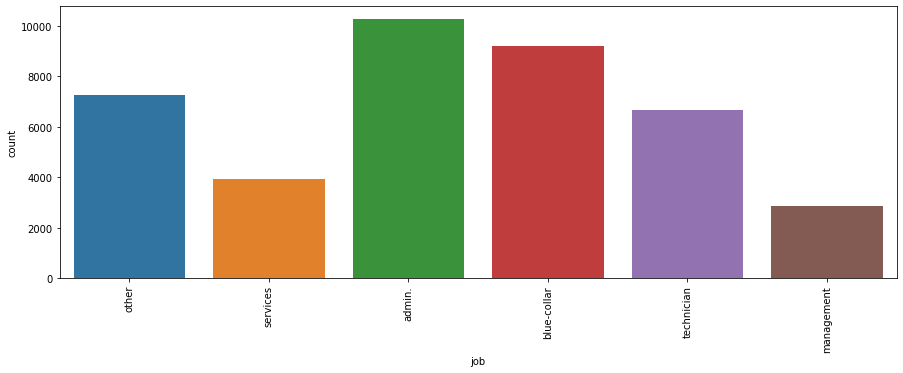

In [ ]:
job = df['job'].value_counts()

group_columns = []
for value in job.index:
    if job[value] < 2000:
        group_columns.append(value)

for value in group_columns:
    df.loc[df['job']==value, 'job'] = 'other'
    
plt.figure(figsize=(15,5))
graphic = sns.countplot('job', data=df)
graphic.tick_params(axis='x', rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


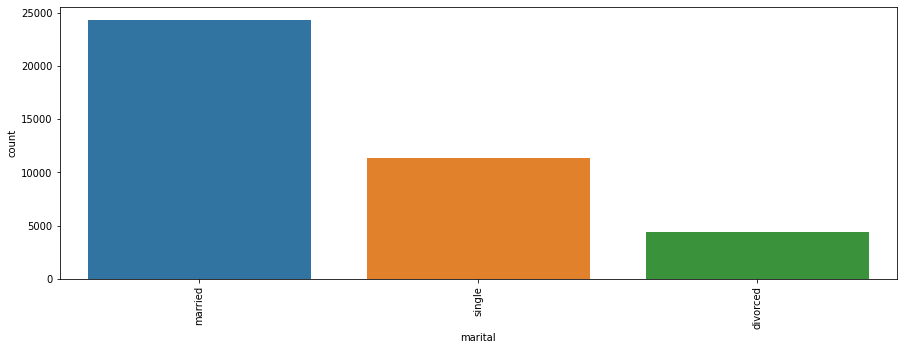

In [ ]:
plt.figure(figsize=(15,5))
graphic = sns.countplot('marital', data=df)
graphic.tick_params(axis='x', rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


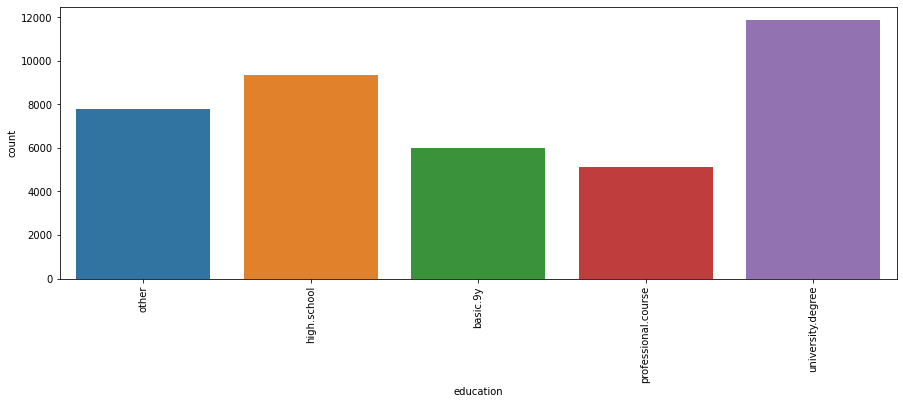

In [ ]:
education = df['education'].value_counts()

group_columns = []
for value in education.index:
    if education[value] < 4000:
        group_columns.append(value)

for value in group_columns:
    df.loc[df['education']==value, 'education'] = 'other'
    
plt.figure(figsize=(15,5))
graphic = sns.countplot('education', data=df)
graphic.tick_params(axis='x', rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


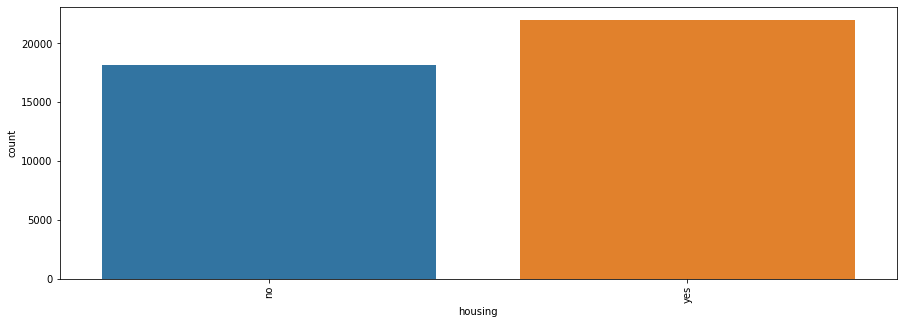

In [ ]:
plt.figure(figsize=(15,5))
graphic = sns.countplot('housing', data=df)
graphic.tick_params(axis='x', rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


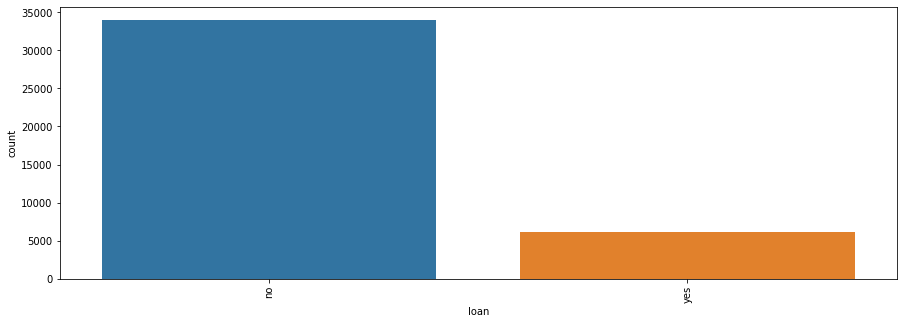

In [ ]:
plt.figure(figsize=(15,5))
graphic = sns.countplot('loan', data=df)
graphic.tick_params(axis='x', rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


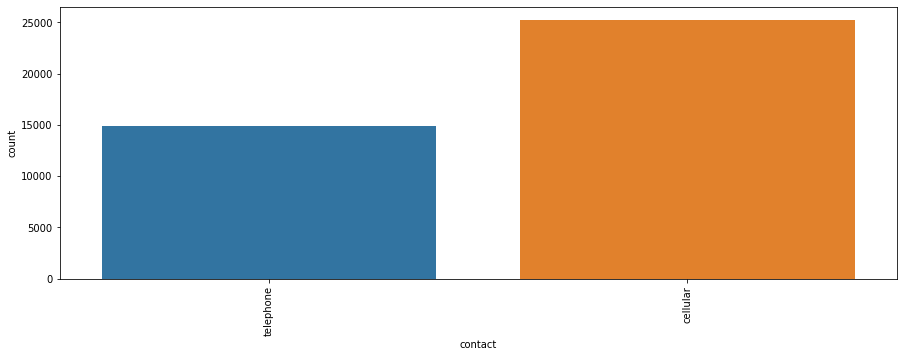

In [ ]:
plt.figure(figsize=(15,5))
graphic = sns.countplot('contact', data=df)
graphic.tick_params(axis='x', rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


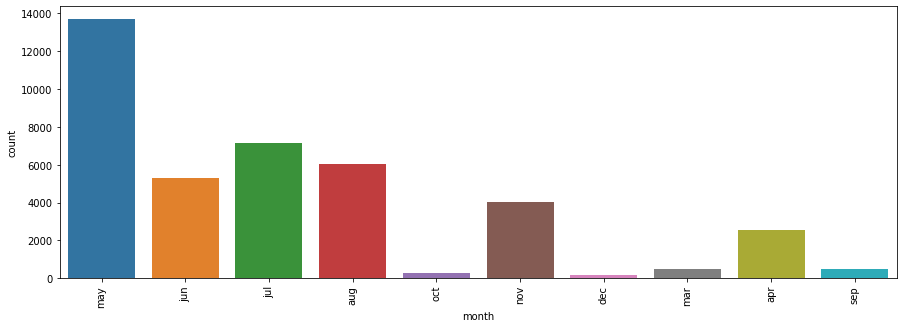

In [ ]:
plt.figure(figsize=(15,5))
graphic = sns.countplot('month', data=df)
graphic.tick_params(axis='x', rotation=90)

We can see that there's no 'jan' or 'feb' but it's not a problem

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


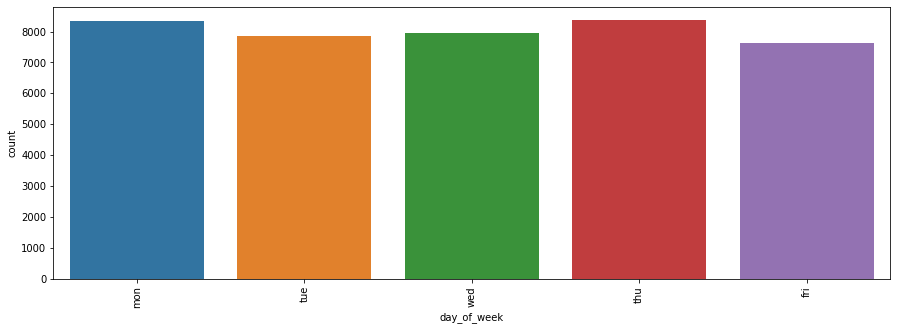

In [ ]:
plt.figure(figsize=(15,5))
graphic = sns.countplot('day_of_week', data=df)
graphic.tick_params(axis='x', rotation=90)

These values are all well balanced, it might not be so important for our machine learning model but we are keeping them for now

**Exploratory Data Analysis**

In [ ]:
categorical_variables = df.select_dtypes(include='object').columns

Univariate Analyisis 

In [ ]:
correlation = data.corr

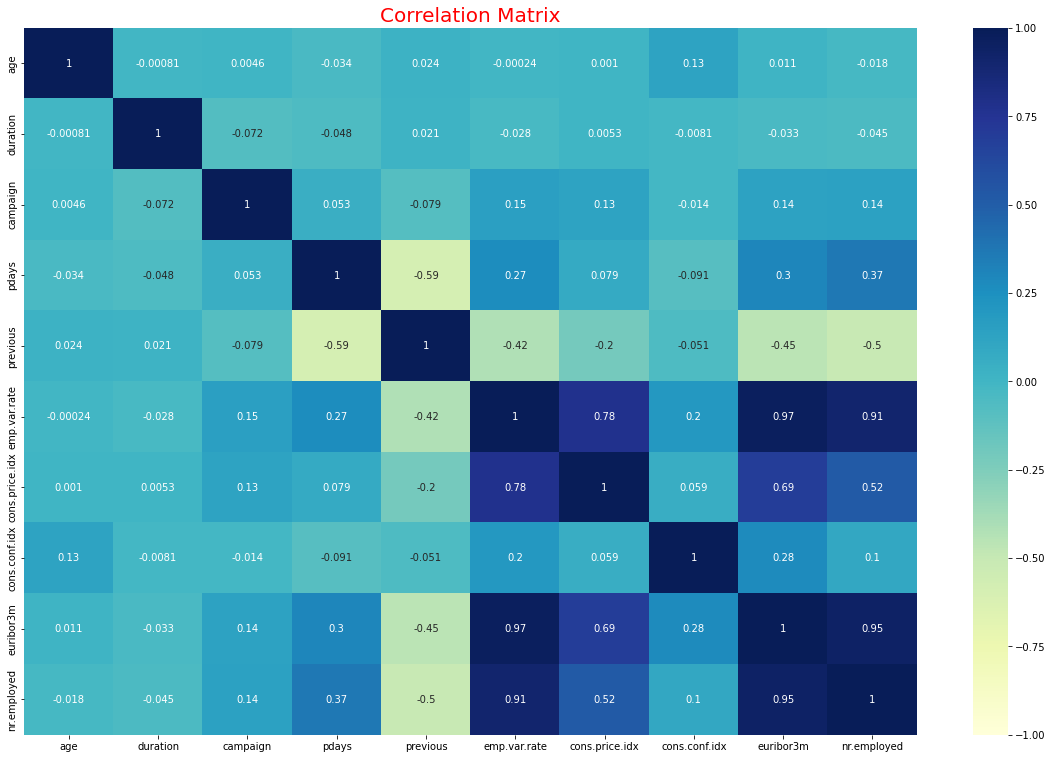

In [ ]:
corr = data.corr()
corr
plt.figure(figsize=(20,13))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap="YlGnBu")
plt.title('Correlation Matrix',fontdict={'color':'red','size':20})
plt.show()

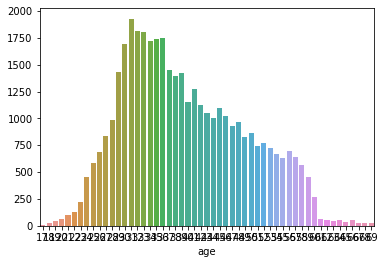

In [ ]:
temp = df.groupby(['age']).age.count()
sns.barplot(x=temp.index,y=temp.values)
plt.show()
     

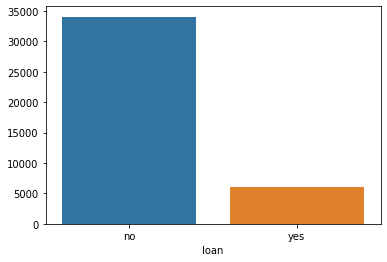

In [ ]:
temp  = df.groupby(['loan']).y.count()
sns.barplot(x=temp.index,y=temp.values)

     

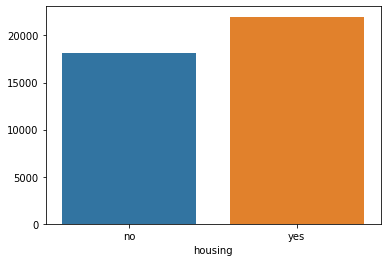

In [ ]:
temp  = df.groupby(['housing']).y.count()
sns.barplot(x=temp.index,y=temp.values)

     

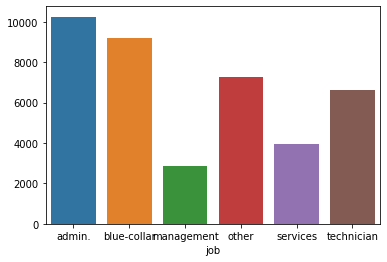

In [ ]:
temp  = df.groupby(['job']).y.count()
sns.barplot(x=temp.index,y=temp.values)

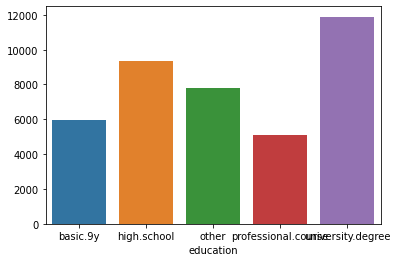

In [ ]:
temp  = df.groupby(['education']).y.count()
sns.barplot(x=temp.index,y=temp.values)


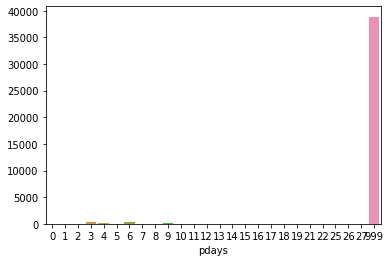

In [ ]:
temp  = df.groupby(['pdays']).y.count()
sns.barplot(x=temp.index,y=temp.values)

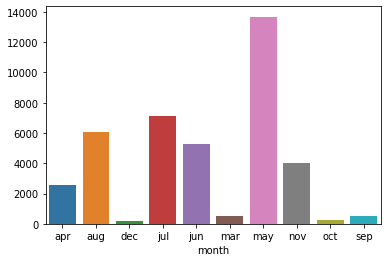

In [ ]:
temp  = df.groupby(['month']).y.count()
sns.barplot(x=temp.index,y=temp.values)
